# Imports

In [1]:
import os
import pydotplus
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from IPython.display import Image

# Load Data

In [2]:
df = pd.read_csv('Data/simplified_master.csv', index_col='Unnamed: 0')
X = df.drop(df.columns[range(20, 43)], axis=1)
X_sim = df.drop(df.columns[range (15) + range(20, 42)], axis=1)
alc = df['Alcoholism']
dep = df['Depression']

# Alcoholism
## Simplified Dataset
### (Get significant features from Random Forest)

In [26]:
# Create Random Forest Object
rfr_sim = RandomForestRegressor(oob_score=True, random_state=1, min_samples_leaf=2)
# Fit to data.
rfr_sim.fit(X_sim, alc)

print rfr_sim.score(X_sim, alc)
print rfr_sim.oob_score_

# Return signigicant variables.
alc_sim_rfr_sig = filter(lambda x: x[1] > 0,
                         sorted(zip(X_sim.columns, [round (i, 4) for i in rfr_sim.feature_importances_]),
                                key=lambda x: x[1], reverse=True))

alc_sim_rfr_sig # All Variables are significant in the simplified dataset.

0.50606056175
-0.0579449010074


[('Sanitation Coverage (%', 0.5064),
 ('caste_diversity', 0.1118),
 ('Sex Ratio (male per 100 female)', 0.1051),
 ('Poverty Severity', 0.104),
 ('Vacc_Access', 0.0923),
 ('Adult illiteracy rate', 0.0573),
 ('Children <5 years malnourished', 0.0231)]

In [27]:
alc_sim_rfr_mse = pd.DataFrame()
alc_sim_rfr_mse['Obs'] = alc
alc_sim_rfr_mse['Pred'] = rfr_sim.predict(X_sim)
alc_sim_rfr_mse['Diff'] = alc_sim_rfr_mse['Obs'] - alc_sim_rfr_mse['Pred']
alc_sim_rfr_mse['DiffSqr'] = alc_sim_rfr_mse['Diff'] ** 2
alc_sim_rfr_mse.sort_values('DiffSqr').head()

,Obs,Pred,Diff,DiffSqr
Jajarkot,0.000239,0.000257,-0.000018,3.093512e-10
Pyuthan,0.000237,0.000257,-0.000020,4.077481e-10
Rukum,0.000278,0.000257,0.000021,4.477087e-10
Baglung,0.000380,0.000403,-0.000023,5.386209e-10
Doti,0.000274,0.000241,0.000033,1.101527e-09


### (Create decision tree)

0.613916878028


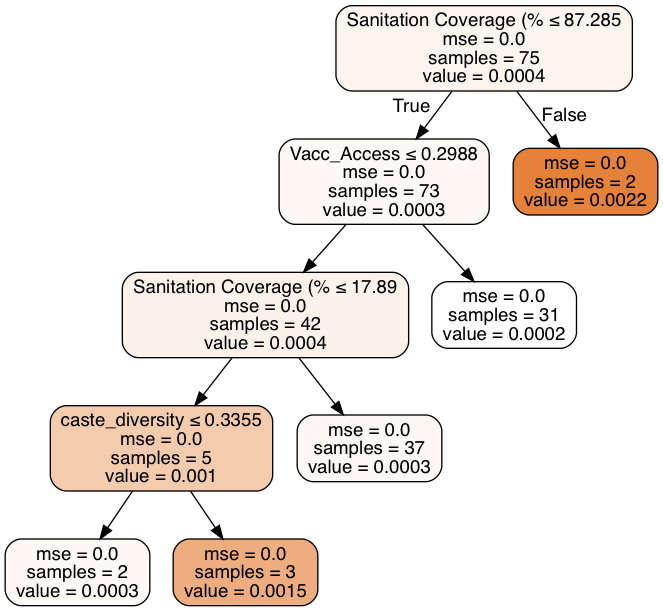

In [28]:
# Create decision tree regressor, tune max leaf nodes, and fit.
dtr_sim = DecisionTreeRegressor(random_state=1, min_samples_leaf=2)
gs = GridSearchCV(estimator=dtr_sim, param_grid={'max_leaf_nodes': range(5, 20)})
gs.fit(X_sim, alc)
best_dtr_sim = gs.best_estimator_

print best_dtr_sim.score(X_sim, alc)

dot_data = export_graphviz(
    best_dtr_sim, feature_names=X_sim.columns,
    out_file=None, filled=True, rounded=True,
    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png(), width=300) 

In [29]:
alc_sim_dtr_mse = pd.DataFrame()
alc_sim_dtr_mse['Obs'] = alc
alc_sim_dtr_mse['Pred'] = best_dtr_sim.predict(X_sim)
alc_sim_dtr_mse['Diff'] = alc_sim_dtr_mse['Obs'] - alc_sim_dtr_mse['Pred']
alc_sim_dtr_mse['DiffSqr'] = alc_sim_dtr_mse['Diff'] ** 2
alc_sim_dtr_mse.sort_values('DiffSqr').head()

,Obs,Pred,Diff,DiffSqr
Syangja,0.000339,0.000336,0.000003,8.369510e-12
Baitadi,0.000203,0.000209,-0.000006,3.172285e-11
Parbat,0.000348,0.000336,0.000012,1.410243e-10
Solukhumbu,0.000349,0.000336,0.000013,1.795236e-10
Panchthar,0.000224,0.000209,0.000015,2.331680e-10


## Full Dataset
### (Get significant features from Random Forest)

In [30]:
# Create Random Forest Object
rfr = RandomForestRegressor(oob_score=True, random_state=1, min_samples_leaf=2)
# Fit to data.
rfr.fit(X, alc)

print rfr.score(X, alc)
print rfr.oob_score_

# Return signigicant variables.
alc_rfr_sig = filter(lambda x: x[1] > 0,
                     sorted(zip(X.columns, [round (i, 4) for i in rfr.feature_importances_]),
                            key=lambda x: x[1], reverse=True))
alc_rfr_sig

0.585508063933
-0.0654518346226


[('Sanitation Coverage (%', 0.3),
 ('Newar', 0.2029),
 ('Hill Brahman', 0.1639),
 ('Mtn/Hill Janajati B', 0.1127),
 ('Sex Ratio (male per 100 female)', 0.0662),
 ('Poverty Severity', 0.0359),
 ('Hill Dalit', 0.0299),
 ('Adult illiteracy rate', 0.027),
 ('Vacc_Access', 0.0246),
 ('Mtn/Hill Janajati A', 0.0196),
 ('Hill Chhetree', 0.0173)]

In [31]:
alc_rfr_mse = pd.DataFrame()
alc_rfr_mse['Obs'] = alc
alc_rfr_mse['Pred'] = rfr.predict(X)
alc_rfr_mse['Diff'] = alc_rfr_mse['Obs'] - alc_rfr_mse['Pred']
alc_rfr_mse['DiffSqr'] = alc_rfr_mse['Diff'] ** 2
alc_rfr_mse.sort_values('DiffSqr').head()

,Obs,Pred,Diff,DiffSqr
Bara,0.000339,0.000344,-0.000005,2.897203e-11
Pyuthan,0.000237,0.000249,-0.000012,1.451504e-10
Tanahu,0.000300,0.000284,0.000016,2.550784e-10
Salyan,0.000243,0.000225,0.000018,3.254725e-10
Udayapur,0.000419,0.000397,0.000022,4.712374e-10


### (Create decision tree)

0.762575188068


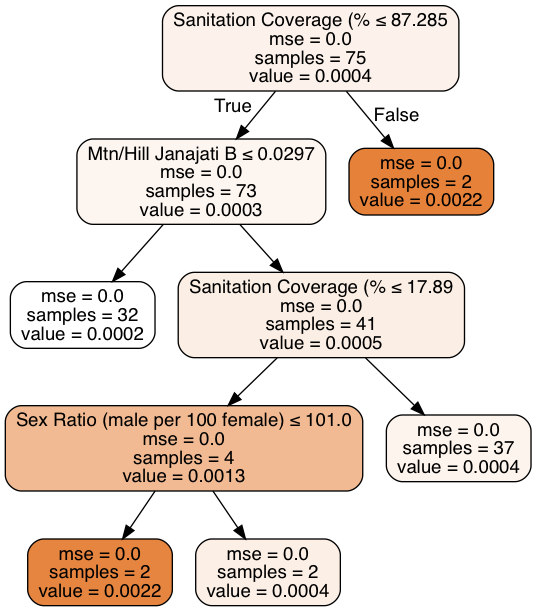

In [32]:
# Create df of sig X variables.
X_alc_sig = X[map(lambda x: x[0], alc_rfr_sig)]

# Create decision tree regressor, tune max leaf nodes, and fit.
dtr = DecisionTreeRegressor(random_state=1, min_samples_leaf=2)
gs = GridSearchCV(estimator=dtr, param_grid={'max_leaf_nodes': range(5, 20)})
gs.fit(X_alc_sig, alc)
best_dtr = gs.best_estimator_

print best_dtr.score(X_alc_sig, alc)

dot_data = export_graphviz(
    best_dtr, feature_names=X_alc_sig.columns,
    out_file=None, filled=True, rounded=True,
    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png(), width=300) 

In [33]:
alc_dtr_mse = pd.DataFrame()
alc_dtr_mse['Obs'] = alc
alc_dtr_mse['Pred'] = best_dtr.predict(X_alc_sig)
alc_dtr_mse['Diff'] = alc_dtr_mse['Obs'] - alc_dtr_mse['Pred']
alc_dtr_mse['DiffSqr'] = alc_dtr_mse['Diff'] ** 2 
alc_dtr_mse.sort_values('DiffSqr').head()

,Obs,Pred,Diff,DiffSqr
Ilam,0.000358,0.000362,-0.000004,1.528484e-11
Jhapa,0.000370,0.000362,0.000008,6.685863e-11
Sankhuwasabha,0.000372,0.000362,0.000009,8.941267e-11
Humla,0.000374,0.000362,0.000011,1.293397e-10
Solukhumbu,0.000349,0.000362,-0.000013,1.634316e-10


# Depression
## Simplified Dataset
### (Get significant features from Random Forest)

In [38]:
# Create Random Forest Object
rfr_sim = RandomForestRegressor(oob_score=True, random_state=1, min_samples_leaf=2)
# Fit to data.
rfr_sim.fit(X_sim, dep)

print rfr_sim.score(X_sim, dep)
print rfr_sim.oob_score_

# Return signigicant variables.
dep_sim_rfr_sig = filter(lambda x: x[1] > 0,
                         sorted(zip(X_sim.columns, [round (i, 4) for i in rfr_sim.feature_importances_]),
                                key=lambda x: x[1], reverse=True))

dep_sim_rfr_sig # All Variables are significant in the simplified dataset.

0.622782187386
-0.143736307935


[('Sex Ratio (male per 100 female)', 0.3875),
 ('Sanitation Coverage (%', 0.1873),
 ('Vacc_Access', 0.1554),
 ('Adult illiteracy rate', 0.1111),
 ('caste_diversity', 0.0776),
 ('Children <5 years malnourished', 0.0551),
 ('Poverty Severity', 0.026)]

In [39]:
dep_sim_rfr_mse = pd.DataFrame()
dep_sim_rfr_mse['Obs'] = dep
dep_sim_rfr_mse['Pred'] = rfr_sim.predict(X_sim)
dep_sim_rfr_mse['Diff'] = dep_sim_rfr_mse['Obs'] - dep_sim_rfr_mse['Pred']
dep_sim_rfr_mse['DiffSqr'] = dep_sim_rfr_mse['Diff'] ** 2
dep_sim_rfr_mse.sort_values('DiffSqr').head()

,Obs,Pred,Diff,DiffSqr
Bardiya,0.000363,0.000363,-1.079608e-07,1.165553e-14
Kathmandu,0.001810,0.001808,2.313941e-06,5.354324e-12
Baitadi,0.000514,0.000502,1.262554e-05,1.594043e-10
Mahottari,0.000381,0.000363,1.736152e-05,3.014223e-10
Sindhupalchok,0.000358,0.000388,-2.963057e-05,8.779708e-10


### (Create decision tree)

0.540531419456


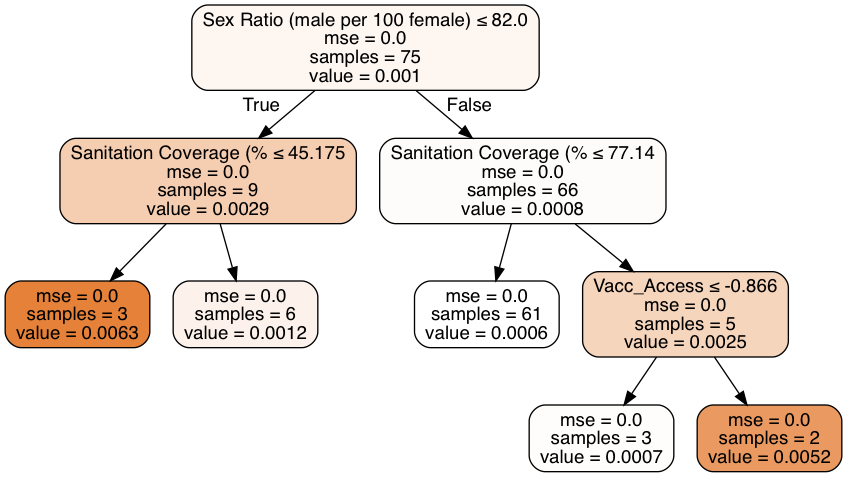

In [40]:
# Create decision tree regressor, tune max leaf nodes, and fit.
dtr_sim = DecisionTreeRegressor(random_state=1, min_samples_leaf=2)
gs = GridSearchCV(estimator=dtr_sim, param_grid={'max_leaf_nodes': range(5, 20)})
gs.fit(X_sim, dep)
best_dtr_sim = gs.best_estimator_

print best_dtr_sim.score(X_sim, dep)

dot_data = export_graphviz(
    best_dtr_sim, feature_names=X_sim.columns,
    out_file=None, filled=True, rounded=True,
    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png(), width=600) 

## Full Dataset
### (Get significant features from Random Forest)

In [41]:
# Create Random Forest Object
rfr = RandomForestRegressor(oob_score=True, random_state=1, min_samples_leaf=2)
# Fit to data.
rfr.fit(X, dep)

print rfr.score(X, dep)
print rfr.oob_score_

# Return signigicant variables.
dep_rfr_sig = filter(lambda x: x[1] > 0,
                     sorted(zip(X.columns, [round (i, 4) for i in rfr.feature_importances_]),
                            key=lambda x: x[1], reverse=True))
dep_rfr_sig

0.683057218074
-0.114678081062


[('Sex Ratio (male per 100 female)', 0.2932),
 ('Hill Brahman', 0.1573),
 ('Hill Chhetree', 0.1009),
 ('Madhesi Brahman/Chhetree', 0.089),
 ('Sanitation Coverage (%', 0.0811),
 ('Tarai Janajati', 0.0748),
 ('Mtn/Hill Janajati A', 0.0555),
 ('Adult illiteracy rate', 0.0458),
 ('Musalman', 0.0427),
 ('Hill Dalit', 0.0173),
 ('Other (MPB)', 0.0113),
 ('Vacc_Access', 0.0093),
 ('Mtn/Hill Janajati B', 0.0085),
 ('Children <5 years malnourished', 0.0084),
 ('Madhesi Other - OC A', 0.003),
 ('Poverty Severity', 0.0011),
 ('Other undefined', 0.0009)]

In [44]:
dep_rfr_mse = pd.DataFrame()
dep_rfr_mse['Obs'] = dep
dep_rfr_mse['Pred'] = rfr.predict(X)
dep_rfr_mse['Diff'] = dep_rfr_mse['Obs'] - dep_rfr_mse['Pred']
dep_rfr_mse['DiffSqr'] = dep_rfr_mse['Diff'] ** 2
dep_rfr_mse.sort_values('DiffSqr').head()

,Obs,Pred,Diff,DiffSqr
Sindhupalchok,0.000358,0.000362,-0.000004,1.920961e-11
Nuwakot,0.000472,0.000458,0.000015,2.104646e-10
Doti,0.000420,0.000443,-0.000022,4.925560e-10
Saptari,0.000289,0.000320,-0.000031,9.541231e-10
Solukhumbu,0.000793,0.000746,0.000047,2.220255e-09


### (Create decision tree)

0.805389014062


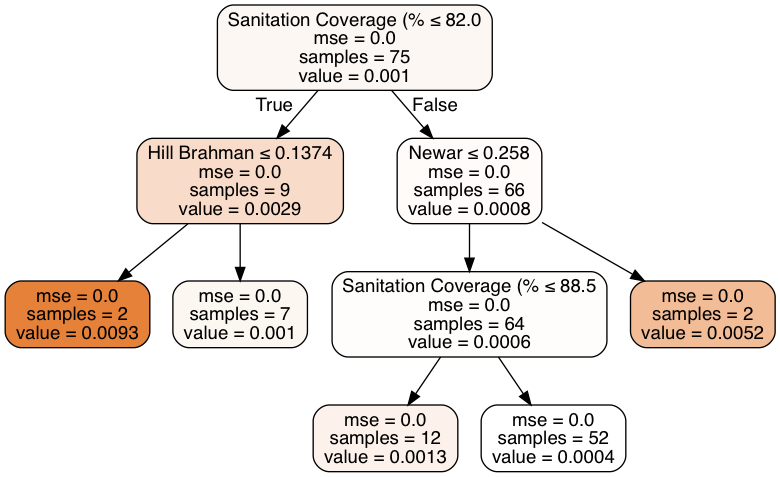

In [47]:
# Create df of sig X variables.
X_dep_sig = X[map(lambda x: x[0], dep_rfr_sig)]

# Create decision tree regressor, tune max leaf nodes, and fit.
dtr = DecisionTreeRegressor(random_state=1, min_samples_leaf=2)
gs = GridSearchCV(estimator=dtr, param_grid={'max_leaf_nodes': range(5, 20)})
gs.fit(X_dep_sig, dep)
best_dtr = gs.best_estimator_

print best_dtr.score(X_dep_sig, dep)

dot_data = export_graphviz(
    best_dtr, feature_names=X_alc_sig.columns,
    out_file=None, filled=True, rounded=True,
    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png(), width=400) 

In [49]:
dep_dtr_mse = pd.DataFrame()
dep_dtr_mse['Obs'] = dep
dep_dtr_mse['Pred'] = best_dtr.predict(X_dep_sig)
dep_dtr_mse['Diff'] = dep_dtr_mse['Obs'] - dep_dtr_mse['Pred']
dep_dtr_mse['DiffSqr'] = dep_dtr_mse['Diff'] ** 2 
dep_dtr_mse.sort_values('DiffSqr').head()

,Obs,Pred,Diff,DiffSqr
Surkhet,0.000445,0.000447,-0.000002,4.395300e-12
Syangja,0.001031,0.001041,-0.000010,1.091741e-10
Nuwakot,0.000472,0.000447,0.000025,6.417179e-10
Dolpa,0.000490,0.000447,0.000044,1.907414e-09
Sankhuwasabha,0.000491,0.000447,0.000045,1.986849e-09
